Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Mabi Mabbayad"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

In [2]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\s7276782\AppData\Local\Continuum\miniconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

start = datetime.date.today() - datetime.timedelta(60*365/12)
end = datetime.date.today()

### Option 2 - Using Yahoo Finance `fix_yahoo_finance` library

In [4]:
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()


In [5]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'FB', 'MMM', 'IBM']
all_stocks = yf.download(all_stocks_list, start = start)
all_stocks.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                          Close  \
                  AMZN         FB         IBM         MMM        AMZN   
Date                                                                    
2015-04-01  370.260010  81.669998  127.835228  141.602890  370.260010   
2015-04-02  372.250000  81.559998  128.855179  141.846848  372.250000   
2015-04-06  377.040009  82.440002  130.132080  144.181915  377.040009   
2015-04-07  374.410004  82.320000  130.156174  144.817963  374.410004   
2015-04-08  381.200012  82.279999  129.979523  144.870285  381.200012   

                                                     High             ...  \
                   FB         IBM         MMM        AMZN         FB  ...   
Date                                                                  ...   
2015-04-01  81.669998  159.179993  162.520004  373.160004  82.720001  ...   
2015-04-02  81.559998  160.449997  162.800003  373.279999  82.559998  ...   
2015-04-06  82.440002  162.039993  165.479996  380.200012  82.809998  ...   
2015-04-07  82.320000  162.070007  166.210007  379.309998  83.419998  ...   
2015-04-08  82.279999  161.850006  166.270004  381.579987  83.099998  ...   

                   Low                    Open                         \
                   IBM         MMM        AMZN         FB         IBM   
Date                                                                    
2015-04-01  158.389999  161.899994  372.100006  82.500000  160.229996   
2015-04-02  158.889999  162.119995  370.500000  82.250000  159.520004   
2015-04-06  158.699997  161.399994  370.100006  80.800003  159.690002   
2015-04-07  161.619995  165.279999  376.149994  82.650002  161.669998   
2015-04-08  161.009995  165.210007  374.660004  82.629997  161.720001   

                         Volume                              
                   MMM     AMZN        FB      IBM      MMM  
Date                                                         
2015-04-01  164.289993  2458100  22058200  3700800  2148100  
2015-04-02  163.380005  1875300  19664100  4671600  1852600  
2015-04-06  161.660004  3050700  19062900  3465700  2560300  
2015-04-07  165.399994  1954900  17467000  3148000  2479500  
2015-04-08  166.210007  2636400  18966700  2524300  1754400  

[5 rows x 24 columns]

In [6]:
#Check if index is Datetime
all_stocks.index

DatetimeIndex(['2015-04-01', '2015-04-02', '2015-04-06', '2015-04-07',
               '2015-04-08', '2015-04-09', '2015-04-10', '2015-04-13',
               '2015-04-14', '2015-04-15',
               ...
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [7]:
all_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-04-01 to 2020-03-30
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMZN)  1258 non-null   float64
 1   (Adj Close, FB)    1258 non-null   float64
 2   (Adj Close, IBM)   1258 non-null   float64
 3   (Adj Close, MMM)   1258 non-null   float64
 4   (Close, AMZN)      1258 non-null   float64
 5   (Close, FB)        1258 non-null   float64
 6   (Close, IBM)       1258 non-null   float64
 7   (Close, MMM)       1258 non-null   float64
 8   (High, AMZN)       1258 non-null   float64
 9   (High, FB)         1258 non-null   float64
 10  (High, IBM)        1258 non-null   float64
 11  (High, MMM)        1258 non-null   float64
 12  (Low, AMZN)        1258 non-null   float64
 13  (Low, FB)          1258 non-null   float64
 14  (Low, IBM)         1258 non-null   float64
 15  (Low, MMM)         1258 non-null   float64
 16  (Open,

In [8]:
# Resamaple data and only get the last Adj Close value for the Business Month
stocks_close_BM = all_stocks['Adj Close'].resample('BM').last()
stocks_close_BM.head()

AMZN         FB         IBM         MMM
Date                                                     
2015-04-30  421.779999  78.769997  137.560608  136.261826
2015-05-29  429.230011  79.190002  138.332123  139.482086
2015-06-30  434.089996  85.769997  132.632507  135.290970
2015-07-31  536.150024  94.010002  132.086212  132.695602
2015-08-31  512.890015  89.430000  121.590149  125.496330

In [9]:
stocks_close_BM.tail()

AMZN          FB         IBM         MMM
Date                                                       
2019-11-29  1800.800049  201.639999  133.060562  168.246429
2019-12-31  1847.839966  205.250000  132.654785  174.836746
2020-01-31  2008.719971  201.910004  142.244659  157.236130
2020-02-28  1883.750000  192.470001  130.149994  149.240005
2020-03-31  1964.939941  160.580002  110.870003  134.940002

In [10]:
#Check if there are any missing values
stocks_close_BM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-04-30 to 2020-03-31
Freq: BM
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    60 non-null     float64
 1   FB      60 non-null     float64
 2   IBM     60 non-null     float64
 3   MMM     60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


In [11]:
# Check the trend for each of the stock symbol
stocks_close_BM.plot()

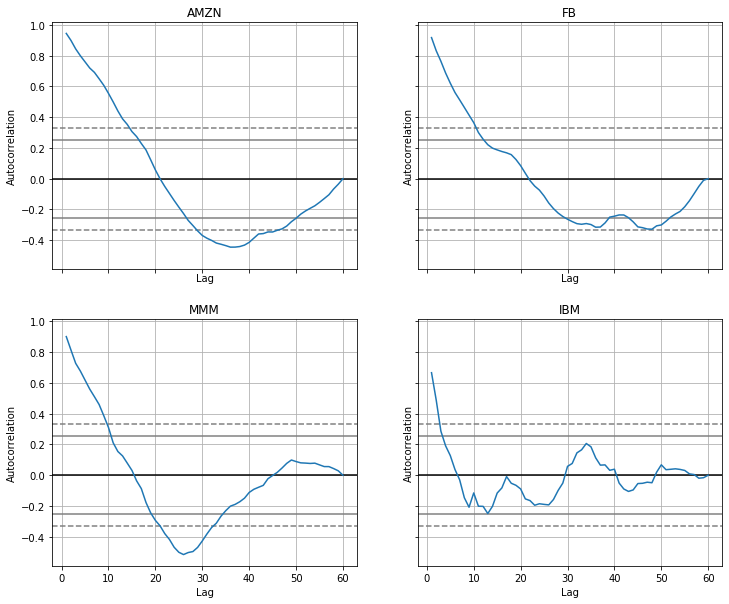

In [12]:
# Plot the adj close autocorrelation for each symbol over time
fig, axs = plt.subplots(2, 2, figsize=(12,10), sharey=True, sharex=True)
axs[0,0].set_title('AMZN')
axs[0,1].set_title('FB')
axs[1,0].set_title('MMM')
axs[1,1].set_title('IBM')
pd.plotting.autocorrelation_plot(stocks_close_BM['AMZN'], ax=axs[0,0])
pd.plotting.autocorrelation_plot(stocks_close_BM['FB'], ax=axs[0,1])
pd.plotting.autocorrelation_plot(stocks_close_BM['MMM'], ax=axs[1,0])
pd.plotting.autocorrelation_plot(stocks_close_BM['IBM'], ax=axs[1,1])
plt.show()

For AMZN, there is significant correlation of the adj closed price to time during the first 15 months and between the 30th and 40th month of the time series.
For FB, there was only significant correlation between price and time during the first 10 months of the series.
For MMM, there was a significant correlation during the first 10 months and somewhere between the 22nd and 32nd month.
IBM on the other had showed very low correlation between adj closed price and time.

In [13]:
#Create a shifted column for each symbol and calculate the return
stocks_return_BM = stocks_close_BM
stocks_return_BM = stocks_return_BM.rename(columns=lambda x: x + "_CURRENT")
stocks_return_BM = pd.concat([stocks_return_BM, stocks_close_BM.shift(1)], axis=1)
stocks_return_BM.dropna(inplace=True)
stocks_return_BM['AMZN'] = (stocks_return_BM['AMZN_CURRENT']/stocks_return_BM['AMZN'] - 1) 
stocks_return_BM['FB'] = (stocks_return_BM['FB_CURRENT']/stocks_return_BM['FB'] - 1)
stocks_return_BM['MMM'] = (stocks_return_BM['MMM_CURRENT']/stocks_return_BM['MMM'] - 1)
stocks_return_BM['IBM'] = (stocks_return_BM['IBM_CURRENT']/stocks_return_BM['IBM'] - 1)
stocks_return_BM.drop(columns=['AMZN_CURRENT','FB_CURRENT','MMM_CURRENT','IBM_CURRENT'], inplace=True)
stocks_return_BM.head(5)

AMZN        FB       IBM       MMM
Date                                              
2015-05-29  0.017663  0.005332  0.005609  0.023633
2015-06-30  0.011323  0.083091 -0.041202 -0.030048
2015-07-31  0.235113  0.096071 -0.004119 -0.019184
2015-08-31 -0.043383 -0.048718 -0.079464 -0.054254
2015-09-30 -0.001950  0.005256 -0.019744 -0.002603

In [14]:
# Plot the return autocorrelation for each symbol over time
fig, axs = plt.subplots(2, 2, figsize=(12,10), sharey=True, sharex=True)
axs[0,0].set_title('AMZN')
axs[0,1].set_title('FB')
axs[1,0].set_title('MMM')
axs[1,1].set_title('IBM')
pd.plotting.autocorrelation_plot(stocks_return_BM['AMZN'], ax=axs[0,0])
pd.plotting.autocorrelation_plot(stocks_return_BM['FB'], ax=axs[0,1])
pd.plotting.autocorrelation_plot(stocks_return_BM['MMM'], ax=axs[1,0])
pd.plotting.autocorrelation_plot(stocks_return_BM['IBM'], ax=axs[1,1])
plt.show()

For all the stocks, there is no significant correlation of the returns as shown in the plots. None of the values are outside of the confidence bands, so there are statistically no significant correlations between the returns of all the symbols over time. 

In [15]:
# Create a scatter_matrix for the data frame containing the returns for the 4 symbols to check if there is 
# correlation between the variables
pd.plotting.scatter_matrix(stocks_return_BM, figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A5148FEEC8>,
      dtype=object)

In [16]:
stocks_return_BM.corr()

AMZN        FB       IBM       MMM
AMZN  1.000000  0.528022  0.453628  0.376387
FB    0.528022  1.000000  0.303446  0.233604
IBM   0.453628  0.303446  1.000000  0.585875
MMM   0.376387  0.233604  0.585875  1.000000

Based on the scatter plot and the result of the pearson coefficient, there seems to be a weak positive correlation between the different stock symbols' returns over time. This has to be further looked into as the correlation might only be incidental and actually caused by other factors not taken into account in this exercise, such as a stronger US economy during the last 5 years, pandemic(drop in the latest returns), etc.